# Análisis de series temporales

## Descarga de un conjunto de datos

El conjunto de datos en cuestión contiene información sobre los valores de las acciones _(stock)_ de la empresa de venta de videojuegos [GameStop](https://es.wikipedia.org/wiki/GameStop). Esta información ha sido recopilada desde el año 2002 hasta enero de 2021, estando referenciada la fecha exacta de cada registro en el conjunto de datos.

Este conjunto de datos ha sido extraído del siguiente _post_ de [Kaggle](https://www.kaggle.com/datasets/hananxx/gamestop-historical-stock-prices), un repositorio público de conjuntos de datos.

In [39]:
import pandas as pd

df = pd.read_csv('../data/input/GME_stock.csv')

## Descripción (cuantitativa) del conjunto de datos y su origen

El conjunto de datos tiene las siguientes características:

| Característica | Descripción |
|-|-|
|`date`|Variable temporal que indica el día de registro de los datos|
|`open_price`|Precio inicial del _stock_ al inicio del día|
|`high_price`|Precio más alto del _stock_ a lo largo del día|
|`low_price`|Precio más bajo del _stock_ a lo largo del día|
|`close_price`|Precio del _stock_ al final del día|
|`volume`|Número de acciones intercambiadas durante el día|
|`adjclose_price`|Precio final del _stock_ ajustado a distribuciones o acciones comerciales ocurridas antes del siguiente día financiero|

In [40]:
display(df)

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
...,...,...,...,...,...,...,...
4768,2002-02-20,9.600000,9.875000,9.525000,9.875000,1723200.0,6.648838
4769,2002-02-19,9.900000,9.900000,9.375000,9.550000,1852600.0,6.430017
4770,2002-02-15,10.000000,10.025000,9.850000,9.950000,2097400.0,6.699336
4771,2002-02-14,10.175000,10.195000,9.925000,10.000000,2755400.0,6.733003


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4773 non-null   object 
 1   open_price      4773 non-null   float64
 2   high_price      4773 non-null   float64
 3   low_price       4773 non-null   float64
 4   close_price     4773 non-null   float64
 5   volume          4773 non-null   float64
 6   adjclose_price  4773 non-null   float64
dtypes: float64(6), object(1)
memory usage: 261.2+ KB


In [42]:
df['volume'].diff().dropna()

1        34580900.0
2        85191300.0
3         -714000.0
4        18910300.0
5      -139704500.0
           ...     
4768       -21000.0
4769       129400.0
4770       244800.0
4771       658000.0
4772     16298600.0
Name: volume, Length: 4772, dtype: float64

In [43]:
df['date'] = pd.to_datetime(df['date'])

In [44]:
df = df[df['date'] <= pd.to_datetime('2019-10-10')]

<Axes: xlabel='date'>

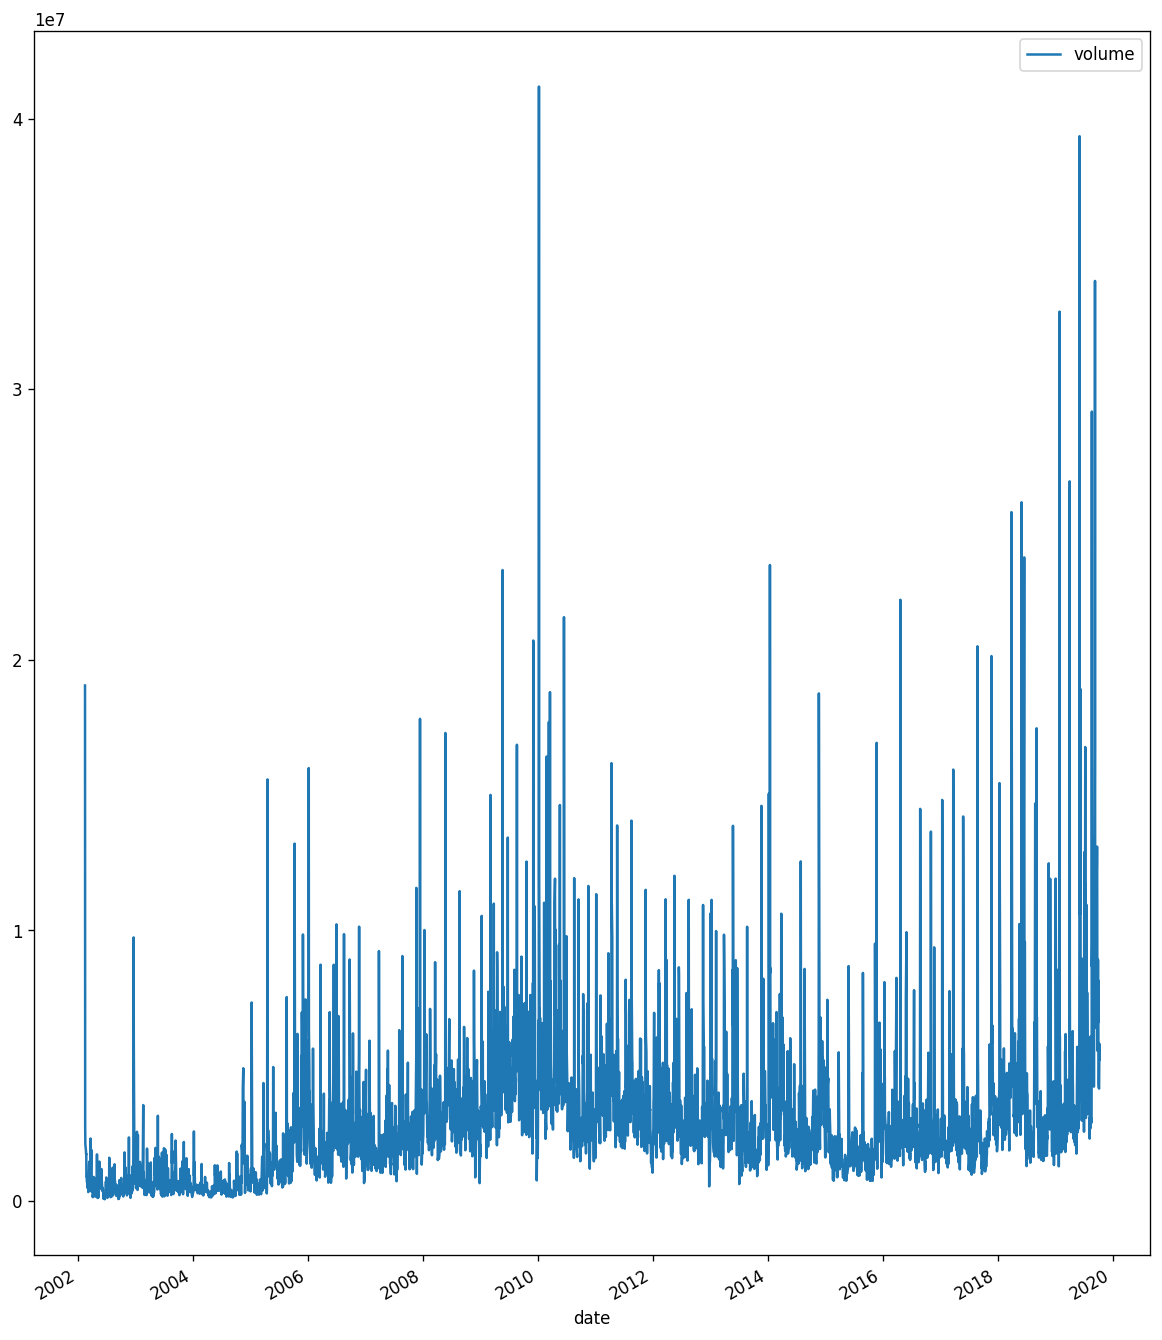

In [45]:
df.plot(x='date', y='volume')

## Cálculo del valor $d$

In [46]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

d_values = {
    'open_price': -1,
    'high_price': -1,
    'low_price': -1,
    'close_price': -1,
    'volume': -1,
    'adjclose_price': -1,
}

P_VALUE_THRESHOLD = 0.05

for column in d_values:
    sub_df = df[column].copy(deep = True)
    
    d = 0
    p_value = float('inf')
    
    while p_value >= P_VALUE_THRESHOLD:
        p_value = adfuller(sub_df)[1]
        if p_value >= P_VALUE_THRESHOLD:
            sub_df = sub_df.diff().dropna()
            d += 1

    d_values[column] = d

    print(f'({column:^16}): p-value = {p_value}, d = {d_values[column]}')

(   open_price   ): p-value = 2.2703940084860375e-30, d = 1
(   high_price   ): p-value = 3.922006220527686e-29, d = 1
(   low_price    ): p-value = 0.0, d = 1
(  close_price   ): p-value = 2.472243349044954e-30, d = 1
(     volume     ): p-value = 3.0009657766848975e-10, d = 0
( adjclose_price ): p-value = 2.368107037021752e-30, d = 1


In [47]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

def plot_diferentiation(subset: pd.DataFrame, d):
    plt.rcParams.update({'figure.figsize': (12, 15), 'figure.dpi': 120})

    _, ax = plt.subplots(d + 1, 2, squeeze=False)

    for i in range(d + 1):
        ax[i][0].plot(subset.values, color = 'r')
        ax[i][0].set_title('Serie Original')
        plot_acf(subset, ax=ax[i][1], color='r')

        subset = subset.diff()

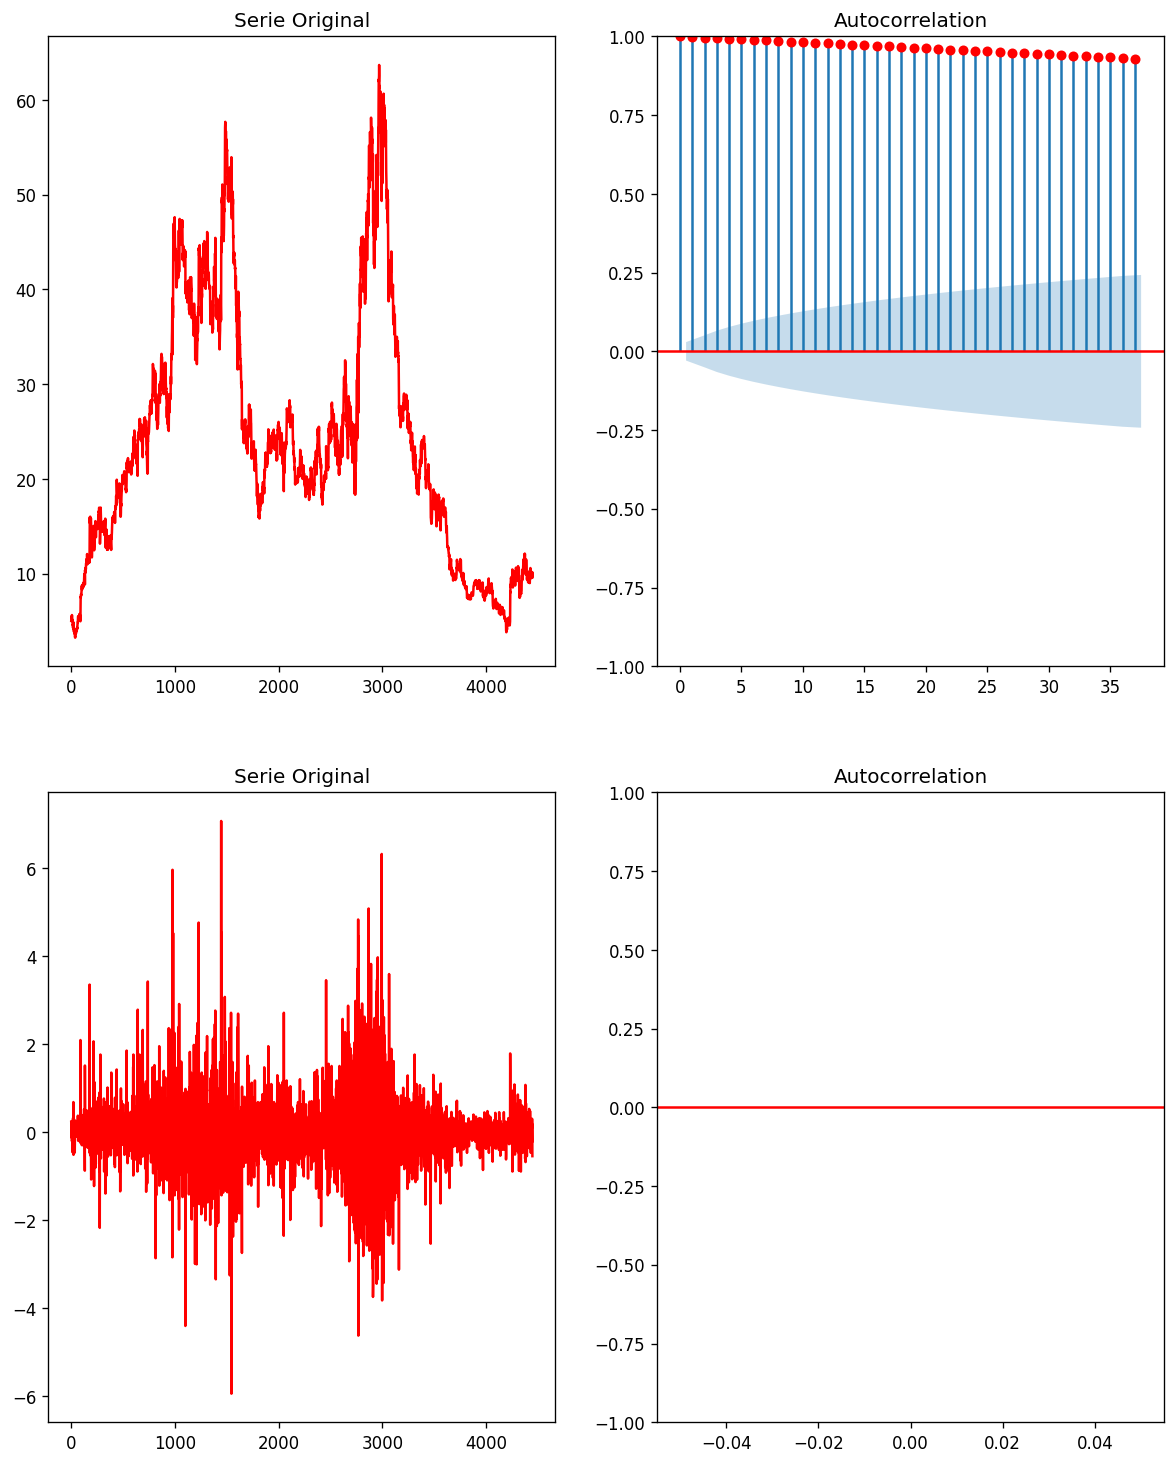

In [48]:
plot_diferentiation(df['open_price'], d_values['open_price'])

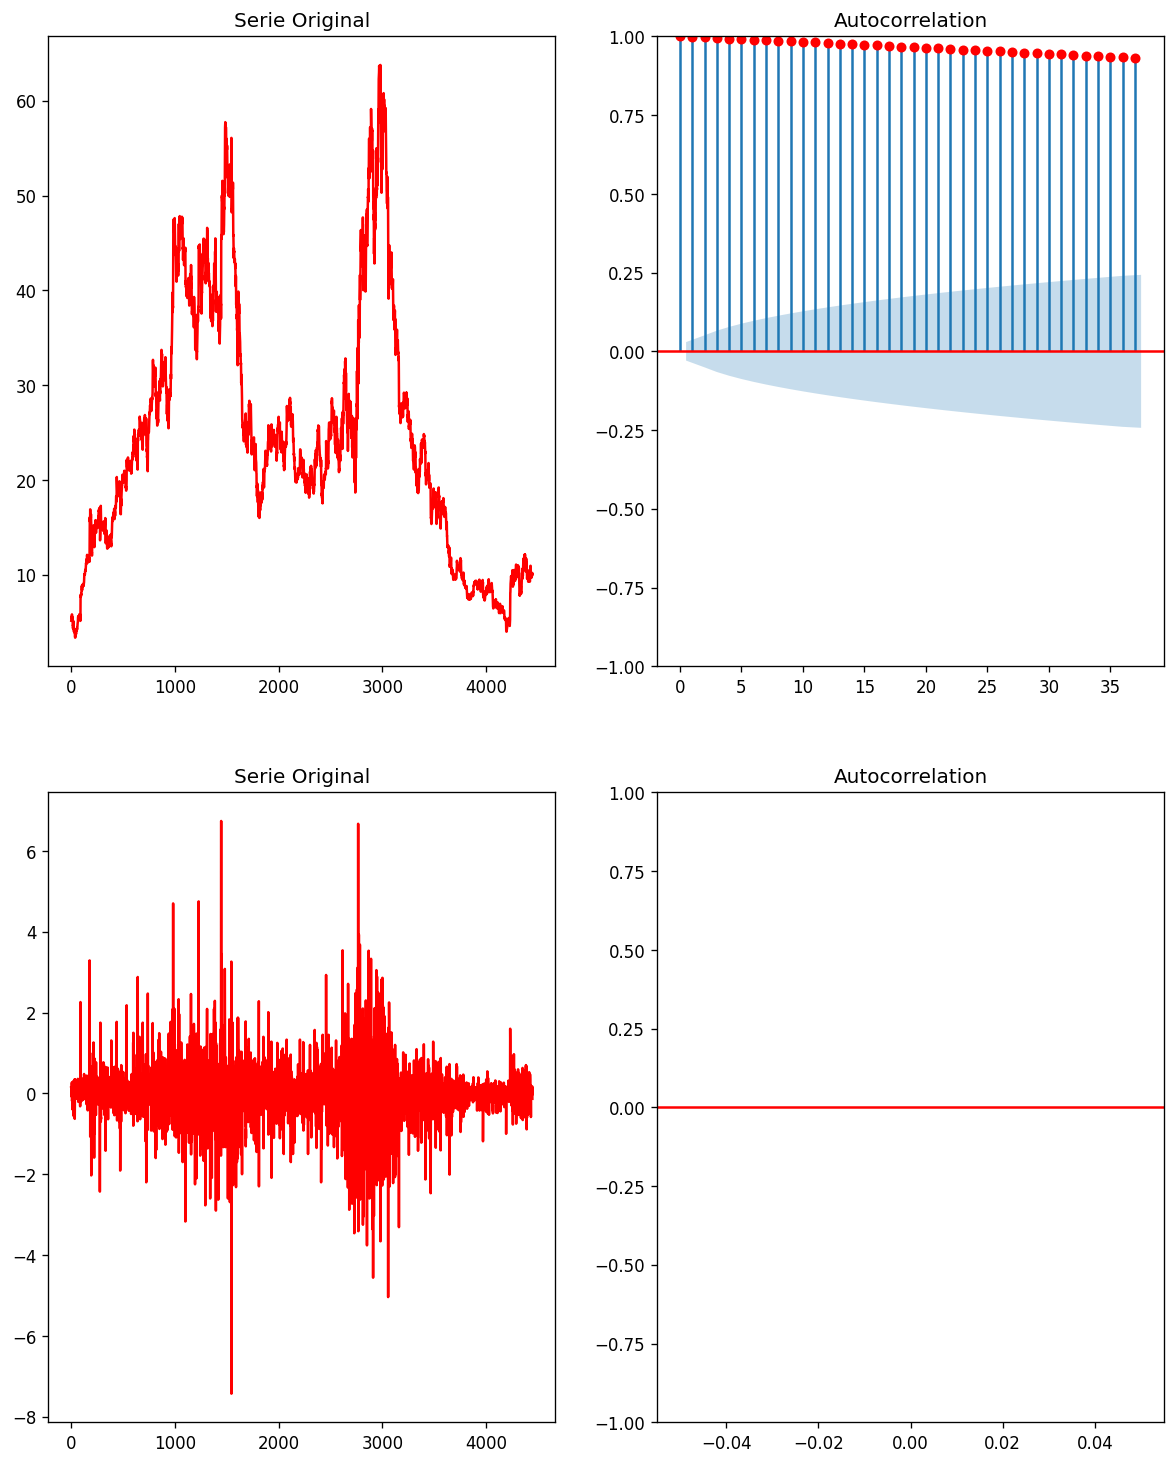

In [49]:
plot_diferentiation(df['high_price'], d_values['high_price'])

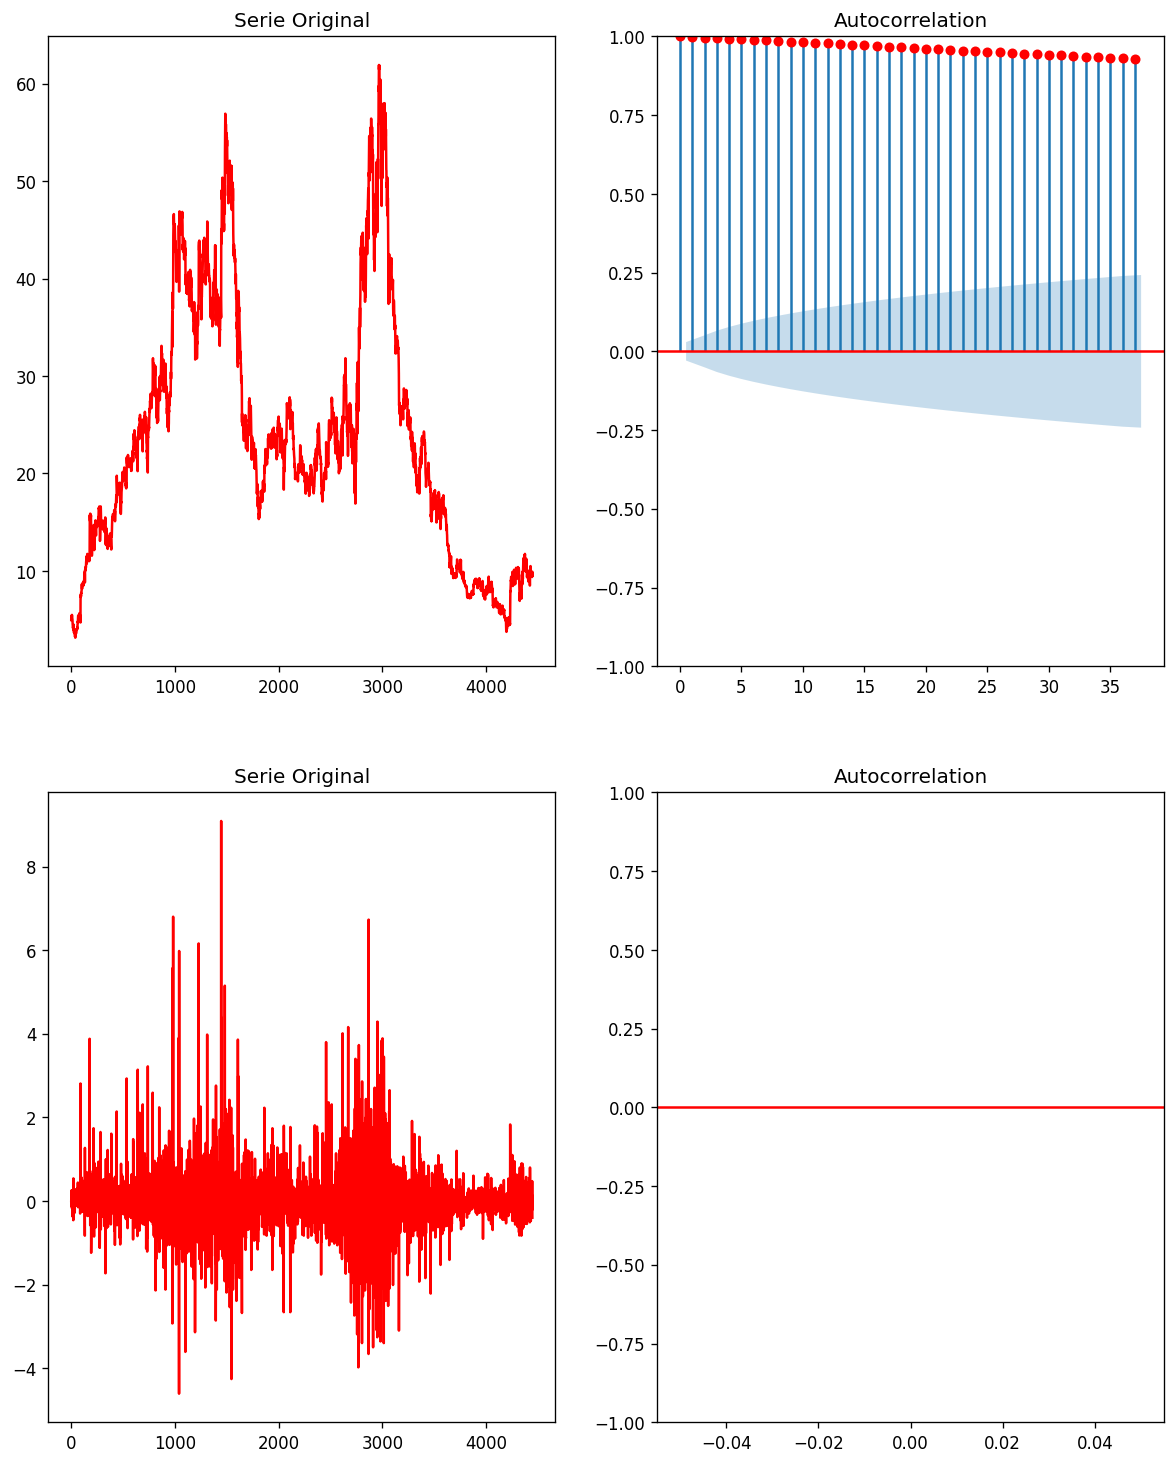

In [50]:
plot_diferentiation(df['low_price'], d_values['low_price'])

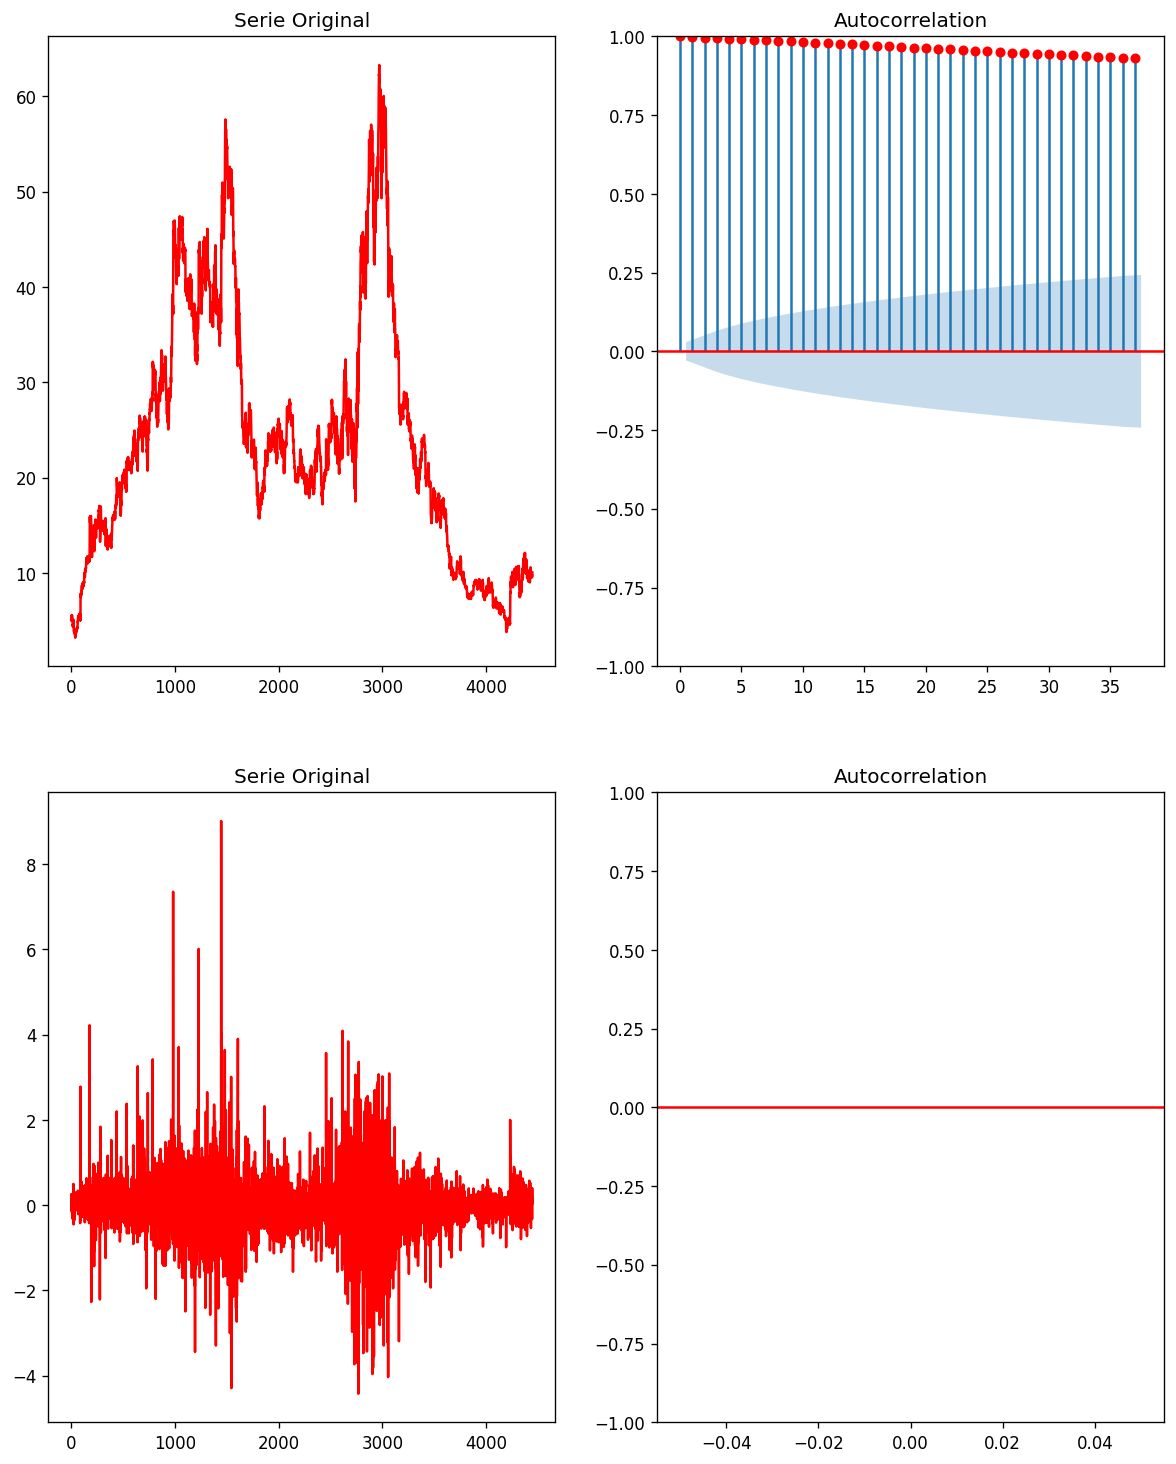

In [51]:
plot_diferentiation(df['close_price'], d_values['close_price'])

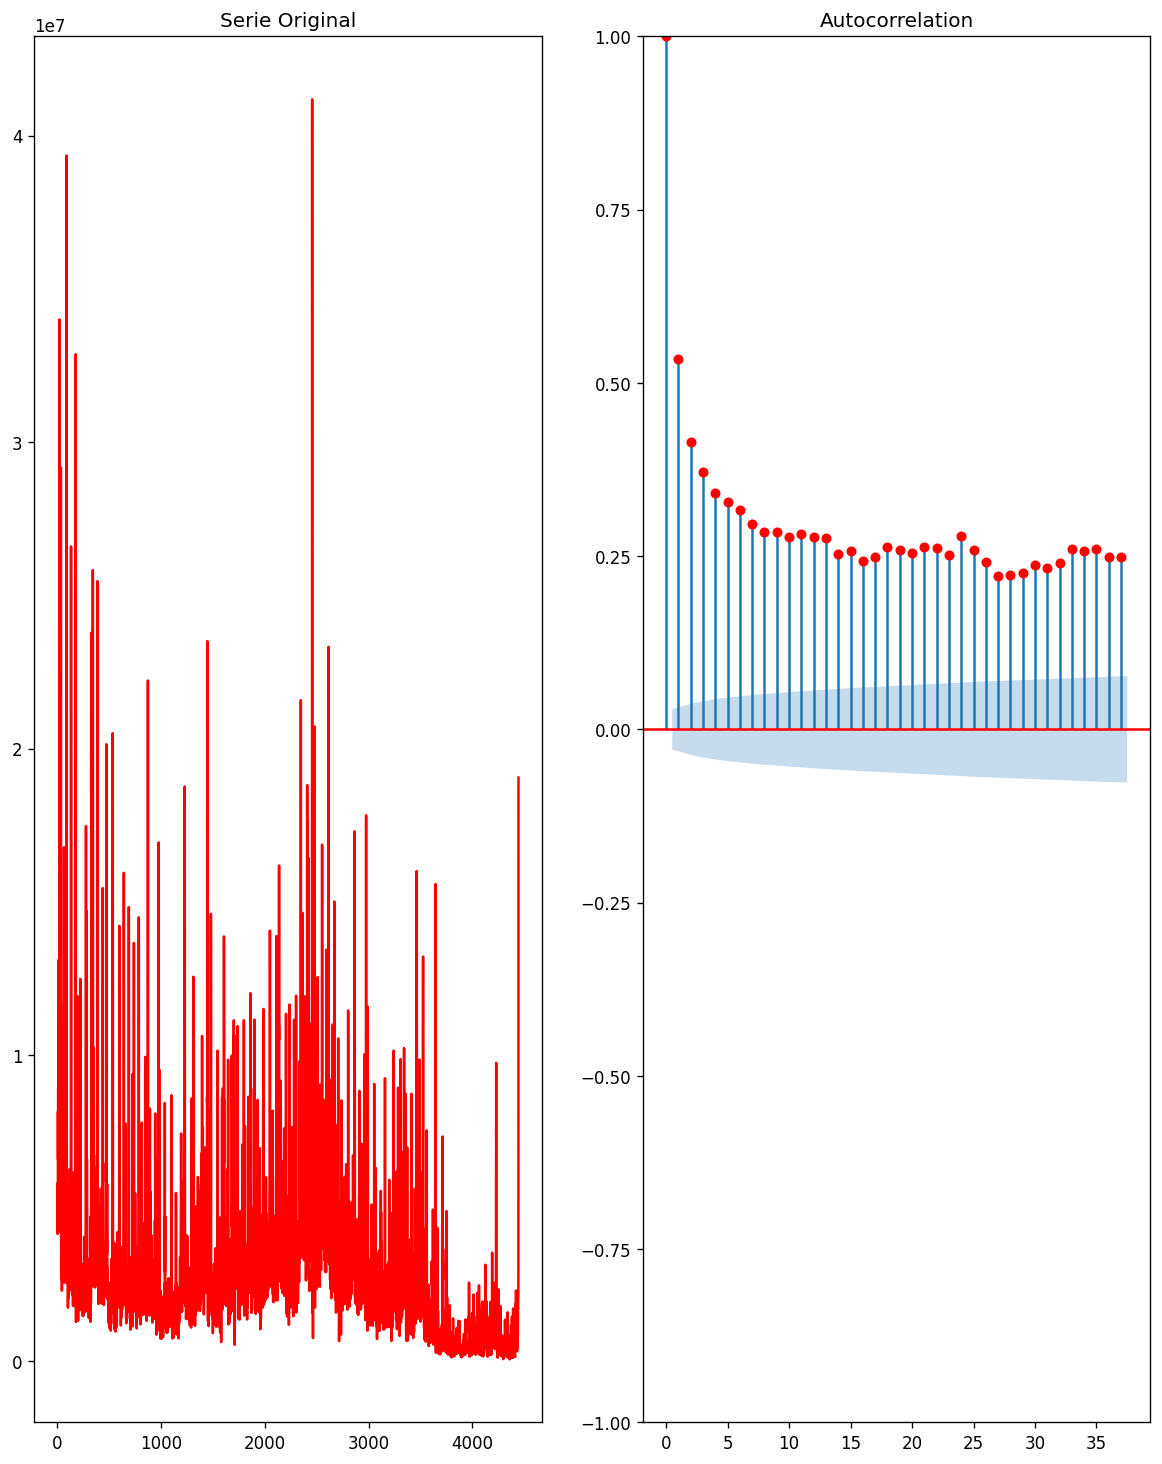

In [52]:
plot_diferentiation(df['volume'], d_values['volume'])

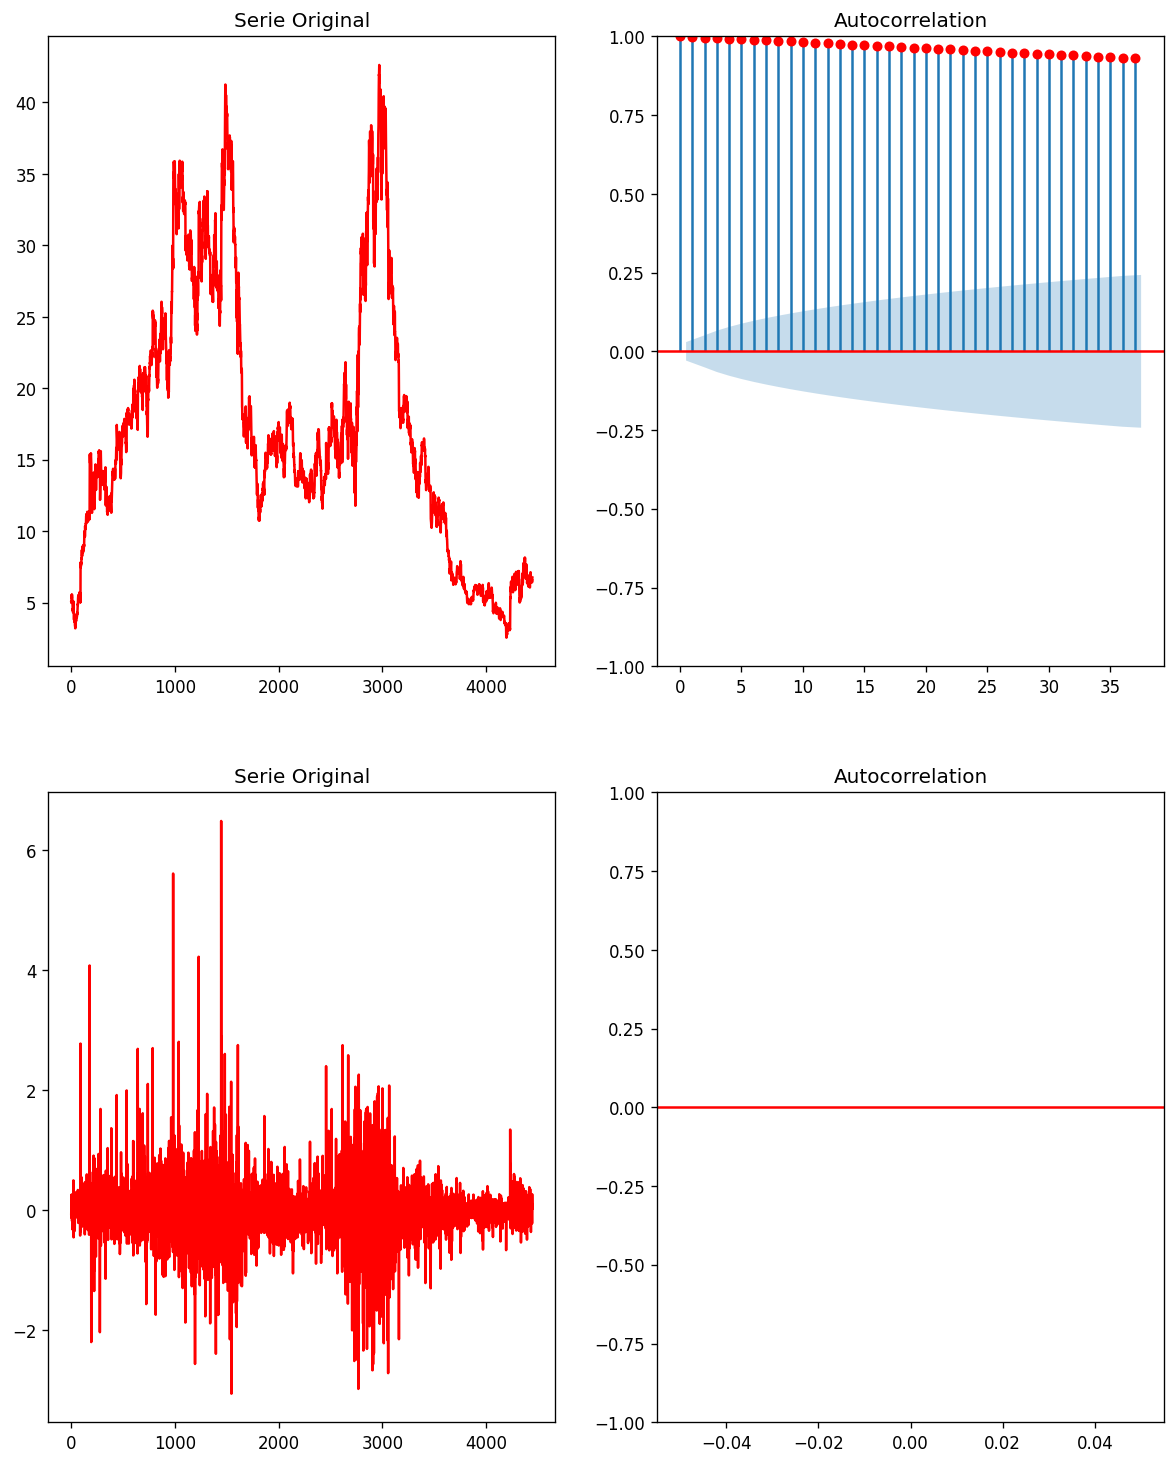

In [53]:
plot_diferentiation(df['adjclose_price'], d_values['adjclose_price'])

## Cálculo del valor $p$

Npi a decir verdad

## Cálculo del valor $q$

Npi a decir verdad.

## ARIMA como en el vídeo

In [102]:
df.columns

Index(['date', 'open_price', 'high_price', 'low_price', 'close_price',
       'volume', 'adjclose_price'],
      dtype='object')

In [103]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

df = df.sort_values(by='date')

training_sets = {
    'open_price': (df['open_price'],      (0, 1, 0)),
    'high_price': (df['high_price'],      (0, 1, 0)),
    'low_price': (df['low_price'],       (0, 1, 0)),
    'close_price': (df['close_price'],     (0, 1, 0)),
    'volume': (df['volume'],          (1, 0, 2)),
    'adjclose_price': (df['adjclose_price'],  (0, 1, 0)),
}

for column in training_sets:
    (y_real, order) = training_sets[column]
    
    model = ARIMA(y_real, order=order)
    results = model.fit()
    y_pred = results.predict()

    display(f'{column}: {r2_score(y_real, y_pred):.2f}')

# print(fit_results.summary())

c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


'open_price: 1.00'

c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


'high_price: 1.00'

c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


'low_price: 1.00'

c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


'close_price: 1.00'

c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


'volume: 0.34'

c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cabre\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


'adjclose_price: 1.00'